In [2]:
import pandas as pd

df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
print(df.Sex.value_counts(),
      df.BP.value_counts(), # Blood Pressure Levels
      df.Cholesterol.value_counts(),
      df.Drug.value_counts(),
      sep='\n'*2)

M    104
F     96
Name: Sex, dtype: int64

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = pd.get_dummies(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']])
Y = le.fit_transform(df['Drug'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.33)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

X_train

(134, 9) (134,)
(66, 9) (66,)


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
127,35,7.845,0,1,0,0,1,0,1
105,37,8.968,0,1,0,1,0,0,1
48,23,31.686,0,1,0,0,1,1,0
66,29,12.856,0,1,1,0,0,1,0
54,68,10.189,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
133,24,25.786,0,1,0,0,1,1,0
137,35,12.894,1,0,1,0,0,1,0
72,24,10.605,1,0,0,0,1,1,0
140,49,6.269,0,1,1,0,0,0,1


SVM accuracy:  0.9848484848484849


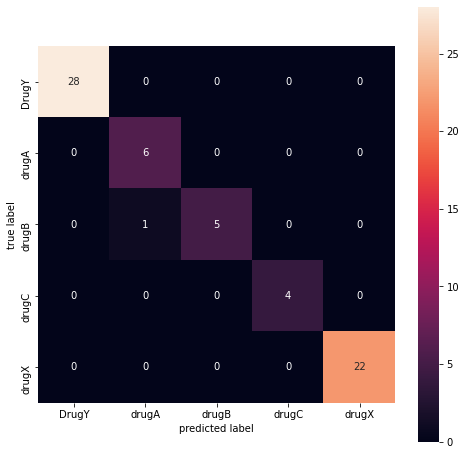

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, Y_train)

def plot_conf_matrix(model, x, y):
    mat = confusion_matrix(y, model.predict(x))
    fig, ax = plt.subplots(figsize=(8,8)) # x - prediction, y - actual
    sns.heatmap(mat, square=True, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

print('SVM accuracy: ', svm.score(X_test, Y_test))
plot_conf_matrix(svm, X_test, Y_test)

del svm

SVM_rbf (rbf) accuracy:  0.7424242424242424


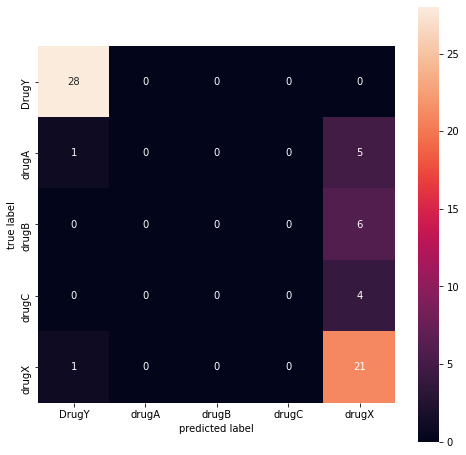

In [8]:
svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train, Y_train)

print('SVM_rbf (rbf) accuracy: ', svm_rbf.score(X_test, Y_test))
plot_conf_matrix(svm_rbf, X_test, Y_test)

del svm_rbf

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.01, 0.001, 0.0001]},
]

cv = GridSearchCV(estimator=SVC(random_state=1), param_grid=param_grid)
cv.fit(X, Y)

# print(cv.best_estimator_)
print(cv.cv_results_['params'][cv.best_index_])
print(cv.best_score_)

del cv

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.99


In [12]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
  {'n_estimators': [50, 100, 200, 500], 'max_depth': [None, 5, 7, 8, 9]},
]

cv = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, n_jobs=-1)
cv.fit(X, Y)

print(cv.cv_results_['params'][cv.best_index_])
print(cv.best_score_)

{'max_depth': None, 'n_estimators': 200}
0.985


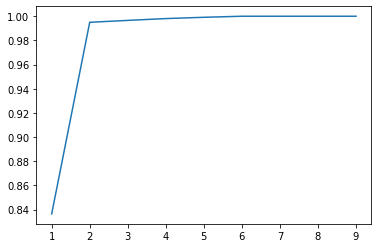

In [13]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)
# print(pca.explained_variance_ratio_)
plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))

SVM accuracy:  0.6818181818181818


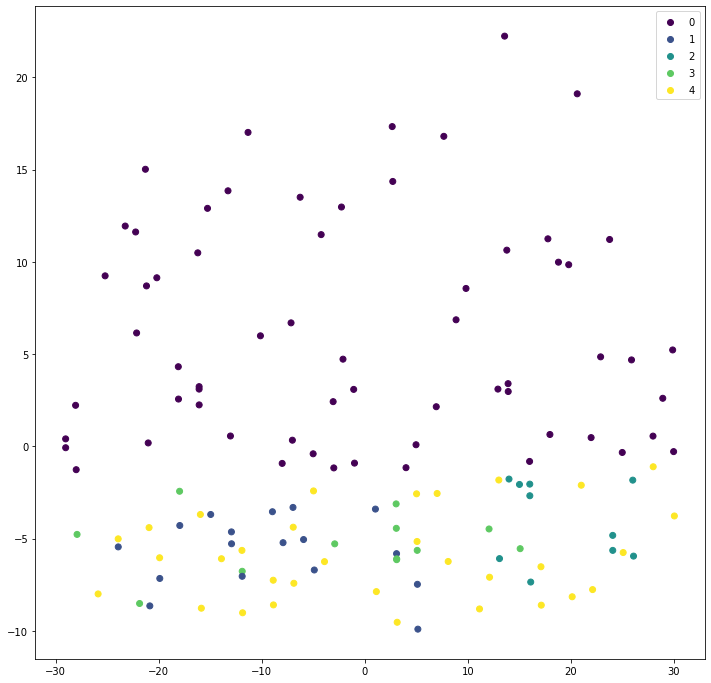

In [14]:
pca = PCA(n_components=2, random_state=1)
X_train_reduced = pca.fit_transform(X_train)

svm = SVC(C=1000, kernel='rbf', gamma=0.001, random_state=1)
svm.fit(X_train_reduced, Y_train)

X_test_reduced = pca.transform(X_test)
print('SVM accuracy: ', svm.score(X_test_reduced, Y_test))

fig, ax = plt.subplots(figsize=(12,12))
scatter = ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=Y_train)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels)
plt.show()

del pca, svm
del X_train_reduced, X_test_reduced

In [15]:
import plotly.express as px

pca = PCA(n_components=3, random_state=1)
X_train_reduced = pca.fit_transform(X_train)

svm = SVC(C=1000, kernel='rbf', gamma=0.001, random_state=1)
svm.fit(X_train_reduced, Y_train)

X_test_reduced = pca.transform(X_test)
print('SVM accuracy: ', svm.score(X_test_reduced, Y_test))

px.scatter_3d(x=X_train_reduced[:,0], y=X_train_reduced[:,1], z=X_train_reduced[:,2], color=Y_train, width=800, height=800)

SVM accuracy:  0.6666666666666666


In [19]:
from sklearn.pipeline import Pipeline

pca = PCA(random_state=1)
svm = SVC(random_state=1)
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])

param_grid = [
    {'pca__n_components': [2, 3, 5, 6, 7, 8], 'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['linear']},
    {'pca__n_components': [2, 3, 5, 6, 7, 8], 'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['rbf'], 'svm__gamma': [1, 0.01, 0.001, 0.0001]},
]
cv = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
cv.fit(X, Y)

print(cv.best_estimator_)
print(cv.best_score_)

del pca, svm, pipe

Pipeline(steps=[('pca', PCA(n_components=6, random_state=1)),
                ('svm', SVC(C=1000, gamma=0.001, random_state=1))])
0.99


In [37]:
res = pd.DataFrame(cv.cv_results_['params']).join(pd.DataFrame({'score': cv.cv_results_['mean_test_score']}))
res.sort_values(by='score', ascending=False).head(10)

,pca__n_components,svm__C,svm__kernel,svm__gamma,score
119,8,1000,rbf,0.0001,0.990
118,8,1000,rbf,0.0010,0.990
86,6,1000,rbf,0.0010,0.990
87,6,1000,rbf,0.0001,0.990
102,7,1000,rbf,0.0010,0.990
103,7,1000,rbf,0.0001,0.990
15,6,1000,linear,NaN,0.985
23,8,1000,linear,NaN,0.985
22,8,100,linear,NaN,0.985
20,8,1,linear,NaN,0.985


In [17]:
from sklearn.pipeline import Pipeline

pca = PCA(random_state=1)
rf = RandomForestClassifier(random_state=1)
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

param_grid = [
    {'pca__n_components': [2, 3, 5, 6, 7, 8], 'rf__n_estimators': [10, 50, 100, 200], 'rf__max_depth': [None, 5, 7, 8, 9]},
]
cv = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
cv.fit(X, Y)

print(cv.best_estimator_)
print(cv.best_score_)

Pipeline(steps=[('pca', PCA(n_components=6, random_state=1)),
                ('rf',
                 RandomForestClassifier(n_estimators=50, random_state=1))])
0.9800000000000001


In [18]:

"""
https://www.kaggle.com/philippurwokoap/svm-multiclass-classification
SVM: 0.7

https://www.kaggle.com/karanpatel219/drug-classification-100-random-forest
RF: 1.0 (?)
"""

'\nhttps://www.kaggle.com/philippurwokoap/svm-multiclass-classification\nSVM: 0.7\n\nhttps://www.kaggle.com/karanpatel219/drug-classification-100-random-forest\nRF: 1.0 (?)\n'